## Time Series Forecasting

### Time Series Patterns

#### Difference Between Trend, Seasonality and cyclic behaviour
**Trend**: If event(Sales, cost) increase consistently every year, then we will see a positive trend in the data. Conversely, if event consistently decline, the trend will be negative.

**Seasonality**: Events may experience an increase in the summer, when the calendar time is better for it. Therefore, we will look at the seasonal component in the event data.

**Cyclic**: If there is an economic recession, event (Sales) may decline because people are more reluctant to spend money. Economic cycles like these can cause cyclical fluctuations in event (Sales) data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

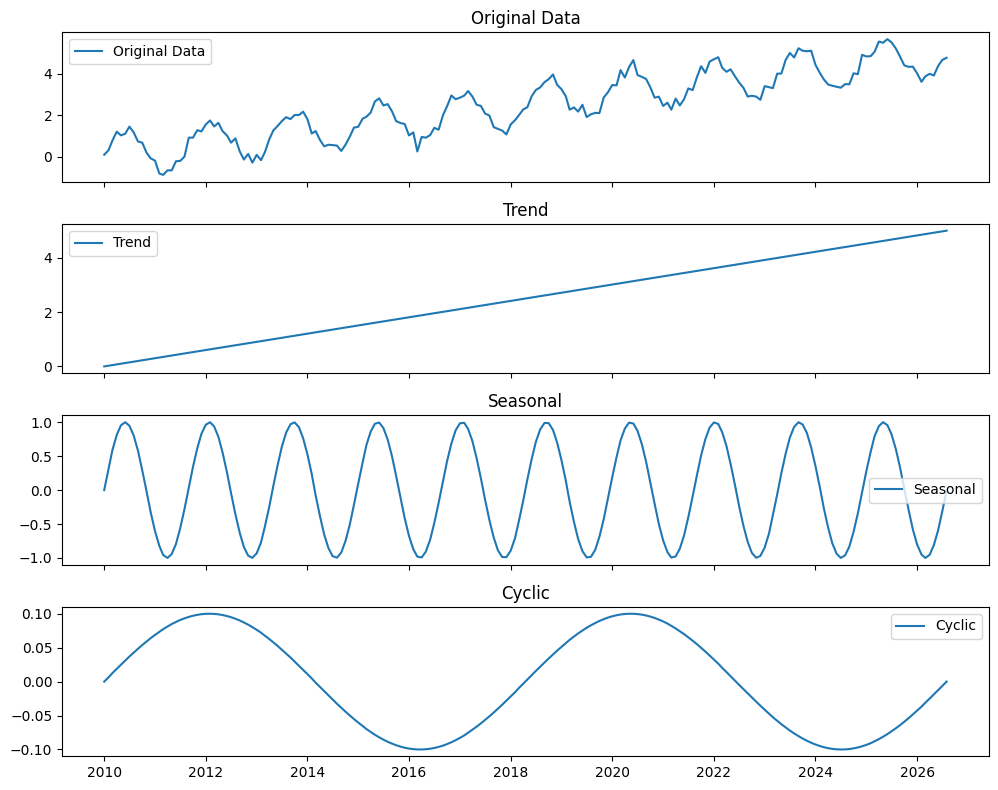

In [3]:
# Make dummy data for Trend, Seasonality and Cycle and Noise
np.random.seed(42)
n = 200  # Define number of samples
t = np.linspace(0, 10, n)

trend = 0.5 * t
seasonal = np.sin(2 * np.pi * t)
cyclical = 0.1 * np.sin(2 * np.pi * t / 5)
noise = 0.2 * np.random.normal(size=n)

data = trend + seasonal + cyclical + noise

# Create DataFrame
df = pd.DataFrame(data, columns=["Sales"])
df.index = pd.date_range(start="2010-01-01", periods=n, freq="MS")

# Plot Trend, Seasonality and Cyclic Data
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax[0].plot(df, label="Original Data")
ax[0].set_title("Original Data")
ax[0].legend()

ax[1].plot(df.index, trend, label="Trend")
ax[1].set_title("Trend")
ax[1].legend()

ax[2].plot(df.index, seasonal, label="Seasonal")
ax[2].set_title("Seasonal")
ax[2].legend()

ax[3].plot(df.index, cyclical, label="Cyclic")
ax[3].set_title("Cyclic")
ax[3].legend()

plt.tight_layout()
plt.show()

#### Seasonal Plots

In [4]:
import pandas as pd
import io, requests
import plotly.express as px

# Use requests so that there are no issues with utf-8 encoding
df = (
    pd.read_csv(
        io.StringIO(
            requests.get(
                "https://raw.githubusercontent.com/joaolcorreia/RFM-analysis/master/sample-orders.csv"
            ).text
        )
    )
    .assign(
        order_date=lambda x: pd.to_datetime(x["order_date"]),
        year=lambda x: x["order_date"].dt.year,
        month=lambda x: x["order_date"].dt.month,
        month_name=lambda x: x["order_date"].dt.strftime("%b"),
    )
    .groupby(["year", "month", "month_name"], as_index=False)
    .agg({"grand_total": "sum"})
)

px.line(df, x="month_name", y="grand_total", color="year")

/var/folders/t8/kwl37c951n7b2z9qz3hgb0n80000gn/T/ipykernel_31892/2916132158.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_date=lambda x : pd.to_datetime(x['order_date']),


### Scatter plots (Correlation plots)
Scatter plot helps us to visualize the relationship between variables. <br>

#### Correlation
It is common to compute correlation coefficients to measure the strength of the **linear relationship** between two variables. <br>
Correlation between $x$ and $y$ <br>
$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$

The value lies between -1 and 1
* -1: Represents negative relationship
* 0: Represents no relationship
* 1: Represents positive relationship

*Note: Correlation coefficient only measures the strength of the linear relationship and can sometimes be misleading as there can be non linear relationship. <br>
That's why it is important to look at the scatter plots and not just the correlational coefficients.*




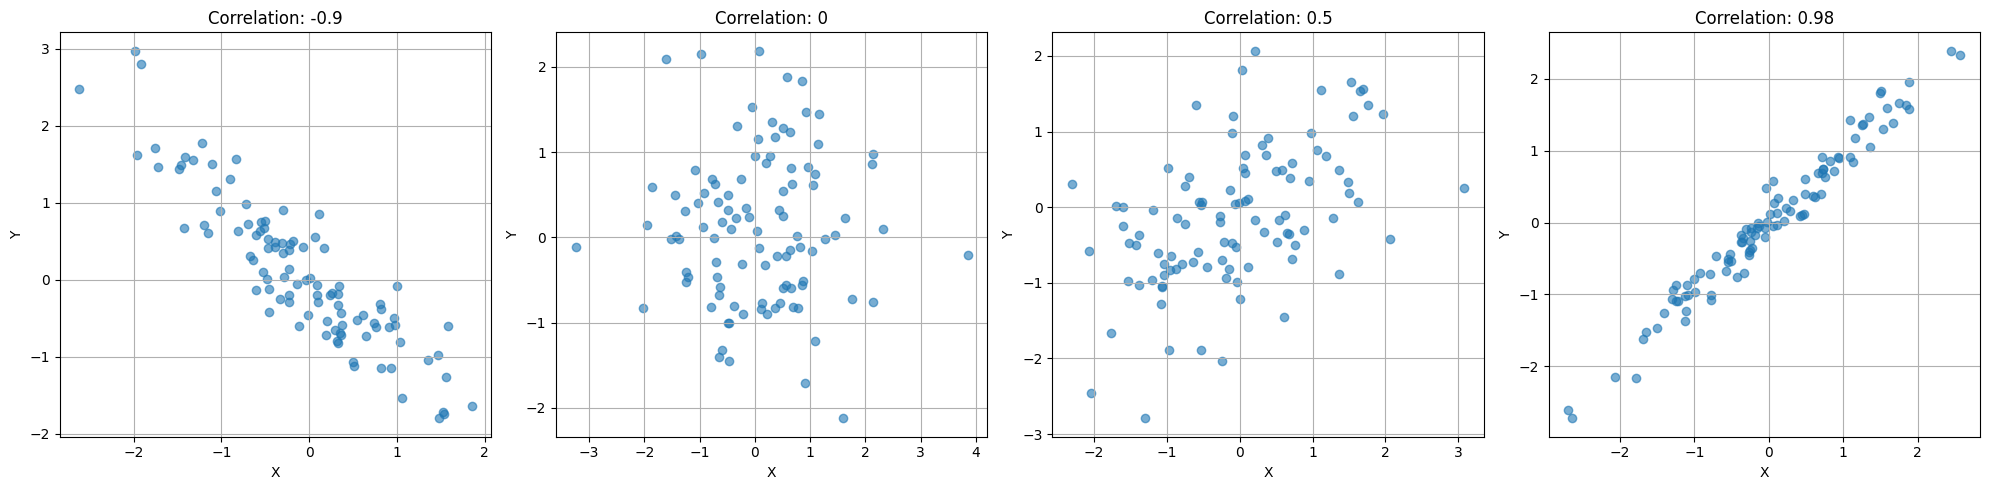

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Function to generate scatter data with a given correlation


def generate_data(correlation, n_points=100):
    x = np.random.normal(0, 1, n_points)
    y = correlation * x + np.sqrt(1 - correlation**2) * np.random.normal(0, 1, n_points)
    return x, y


# Define correlations
correlations = [-0.9, 0, 0.5, 0.98]
n_points = 100

# Plot scatterplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=False)
for i, corr in enumerate(correlations):
    x, y = generate_data(corr, n_points)
    axs[i].scatter(x, y, alpha=0.6)
    axs[i].set_title(f"Correlation: {corr}")
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Y")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

#### Examples with Two Edge Cases
1. Example with good correlation coefficients but no relationship is seen visually.
The reason for it is due to **Outlier**. 

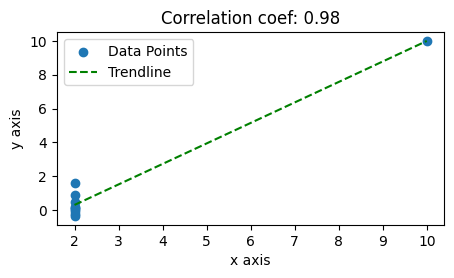

In [39]:
# Generate Examples
x = np.array([0] * 0 + [2] * 9 + [10] * 1)
y = np.array(np.random.randn(9).tolist() + [10])

# Get correlation between x and y
corr_coef = np.corrcoef(x, y)[0, 1]

# Create a plot
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.scatter(x, y, label="Data Points")
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("Correlation coef: {:.2f}".format(corr_coef))

# Plot a Trend Line
linear_coeff = np.polyfit(x, y, 1)
ax.plot(
    x,
    linear_coeff[0] * x + linear_coeff[1],
    color="green",
    linestyle="--",
    label="Trendline",
)
ax.legend()

2. Example with poor correlation but a non linear relationship 

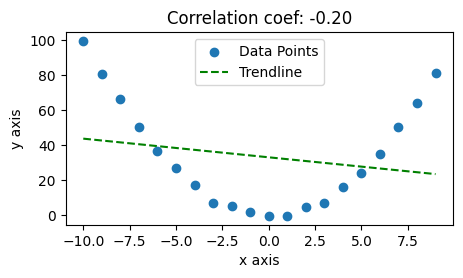

In [43]:
# Generate Examples
x = np.arange(-10, 10)
y = x**2 + np.random.randn(len(x))

# Get correlation between x and y
corr_coef = np.corrcoef(x, y)[0, 1]

# Create a plot
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.scatter(x, y, label="Data Points")
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("Correlation coef: {:.2f}".format(corr_coef))

# Plot a Trend Line
linear_coeff = np.polyfit(x, y, 1)
ax.plot(
    x,
    linear_coeff[0] * x + linear_coeff[1],
    color="green",
    linestyle="--",
    label="Trendline",
)
ax.legend()

### Lag plots
| t | y(t) | Lag: y(t - 1) | Lead: y(t + 1) |
| - | ---- | ------------- | -------------- |
| 0 | 1    |               | 2              |
| 1 | 2    | 1             | 3              |
| 2 | 3    | 2             | 4              |
| 3 | 4    | 3             | 5              |
| 4 | 5    | 4             |                |

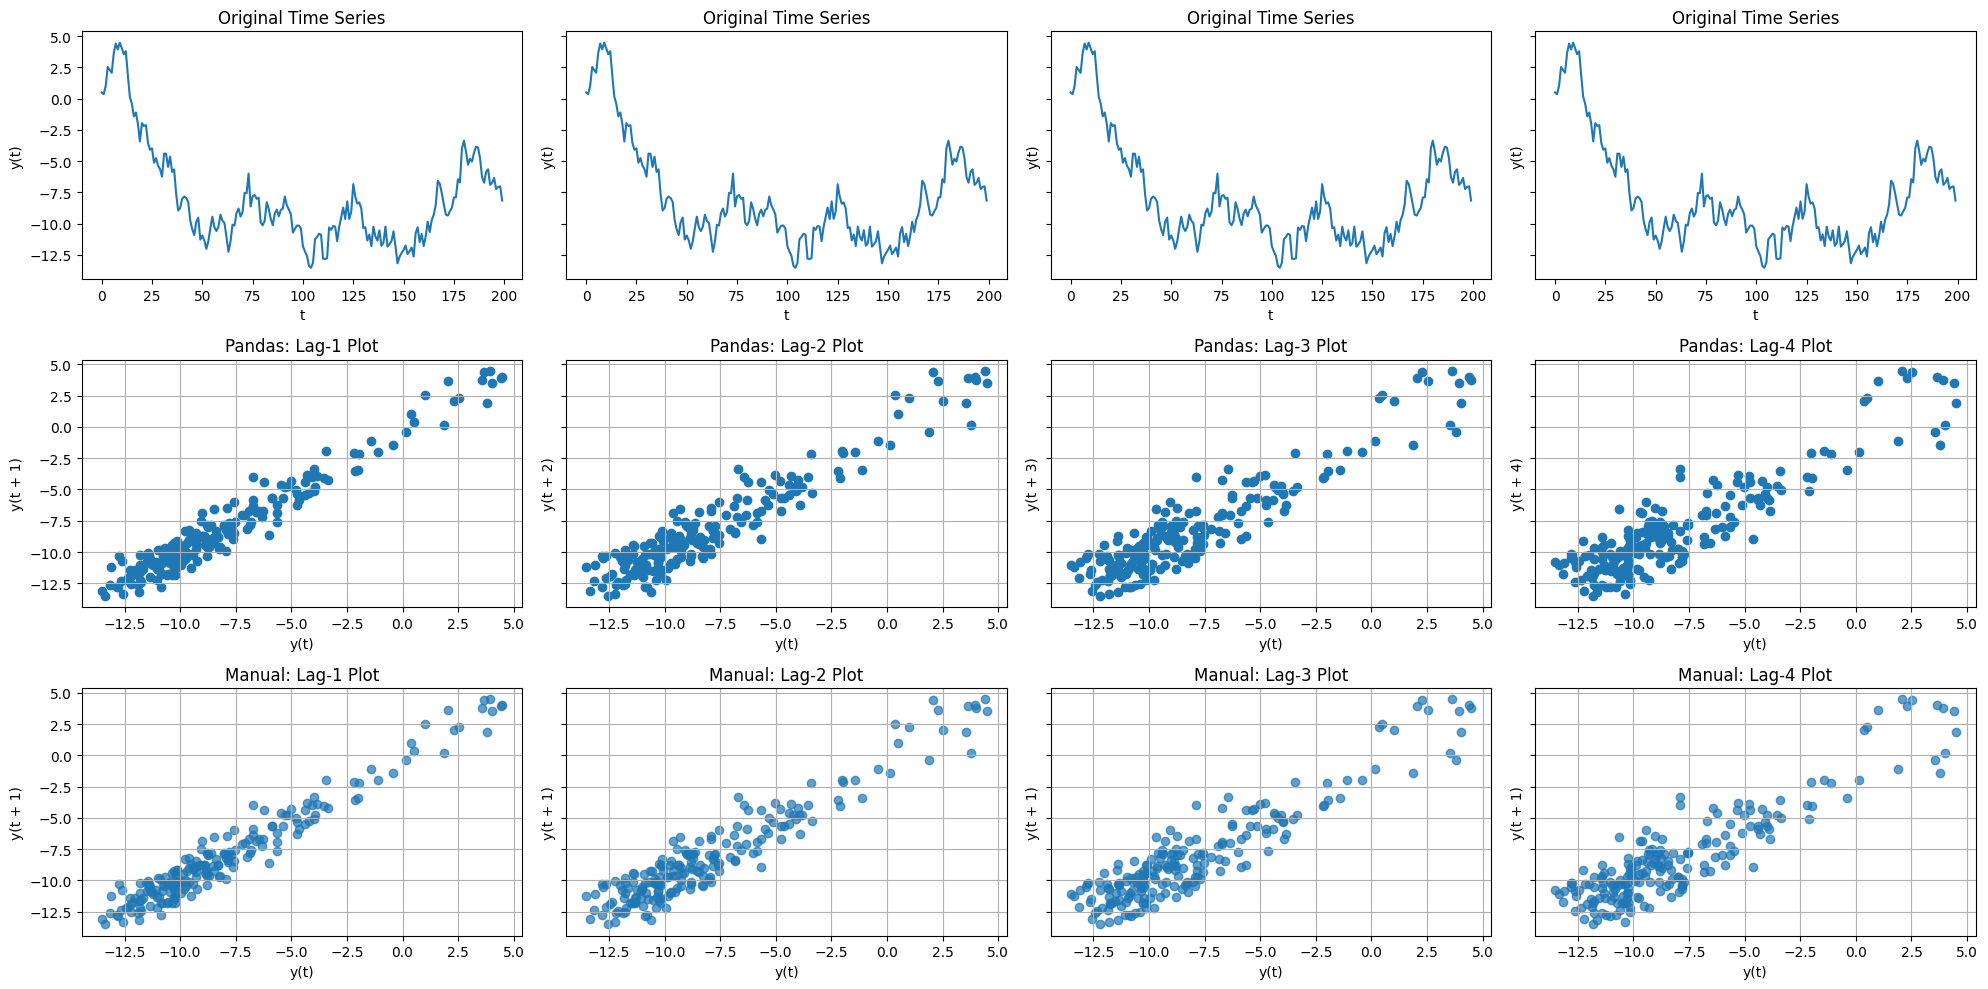

In [3]:
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
n_points = 200
time_series = np.cumsum(np.random.normal(0, 1, n_points))  # Random walk

# Create lag plots
lags = [1, 2, 3, 4]
fig, axs = plt.subplots(3, len(lags), figsize=(20, 10), sharey=True)

for i, lag in enumerate(lags):

    # Plot the Original data
    axs[0, i].plot(time_series)
    axs[0, i].set_xlabel("t")
    axs[0, i].set_ylabel("y(t)")
    axs[0, i].set_title("Original Time Series")

    # Create Lag Plot using Pandas
    lag_plot(pd.Series(time_series), lag=lag, ax=axs[1, i])
    axs[1, i].set_title(f"Pandas: Lag-{lag} Plot")
    axs[1, i].grid(True)

    # Create Lag plot manually
    x = time_series[:-lag]  # Original data y(t)
    y = time_series[
        lag:
    ]  # Lead data y(t + 1): This is done from forecasting perspective, whether y(t) can forecast y(t + 1)

    # Lag plots
    axs[2, i].scatter(x, y, alpha=0.7)
    axs[2, i].set_title(f"Manual: Lag-{lag} Plot")
    axs[2, i].set_xlabel("y(t)")
    axs[2, i].set_ylabel("y(t + 1)")
    axs[2, i].grid(True)

plt.tight_layout()
plt.show()

#### AutoCorrelation
AutoCorrelation measures the Linear Relationship between lagged values of a time series. <br>

##### AutoCorrelation Function
$r_k = \frac{\sum_{t=1}^{N-k} (x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t=1}^N (x_t - \bar{x})^2} $ <br>
$k$: Measures the lag value: can be 1, 2, 3 <br>
$N$: Length of Time Series

ACF Plots are also known as *Correlogram*

Important Observations:
1. When data have trend, the autocorrelation for small lags tend to be large and positive because observations nearby in time are also nearby in value.
2. When data are seasonalm tge autocorrelations will be larger for the seasonal lags(at multiple of the seasonal period) than for other lags.
3. Confidence Interval indicates whether the correlations are significantly different from ZERO

##### ACF Plot using Pandas

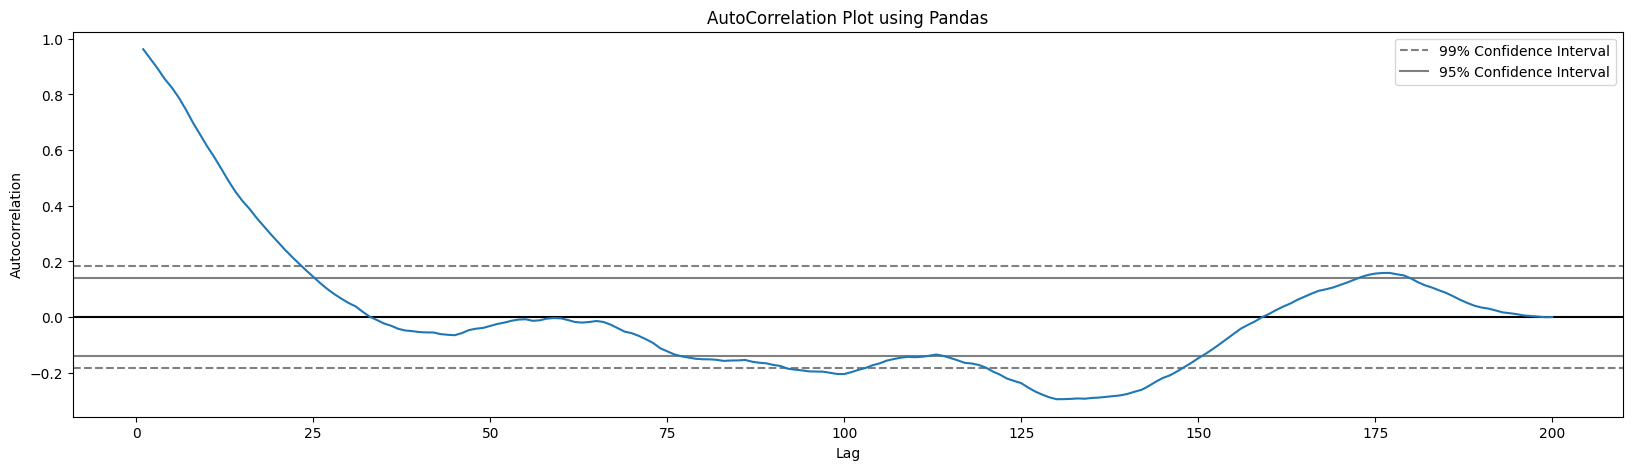

In [ ]:
from pandas.plotting import autocorrelation_plot

# Function to calculate autocorrelation at a given lag


def autocorrelation(data, lag):
    n = len(data)
    mean = np.mean(data)
    numerator = np.sum((data[: n - lag] - mean) * (data[lag:] - mean))
    denominator = np.sum((data - mean) ** 2)
    return numerator / denominator


# AutoCorrelation plots using pandas
fig, ax = plt.subplots(figsize=(20, 5))
ax = autocorrelation_plot(time_series, ax=ax)
ax.set_title("AutoCorrelation Plot using Pandas")
ax.legend(["99% Confidence Interval", "95% Confidence Interval"], loc="upper right")
ax.grid(False)

##### ACF using Statsmodel plot_acf

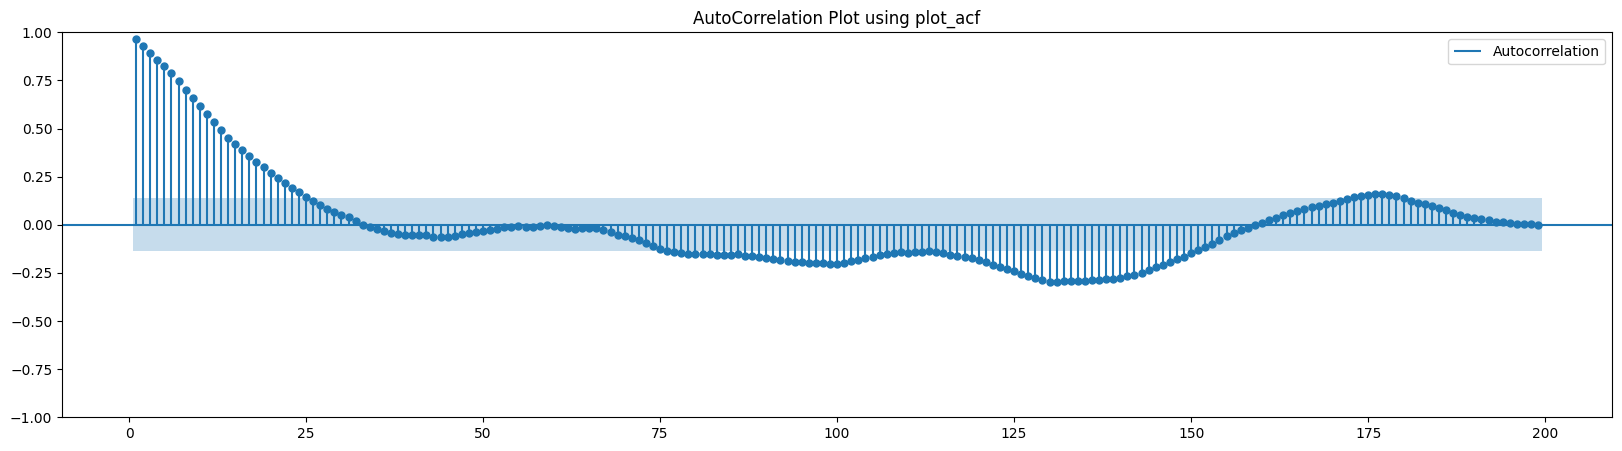

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# AutoCorrelation plots using pandas
fig, ax = plt.subplots(figsize=(20, 5))
plot_acf(
    time_series,
    ax=ax,
    lags=199,
    alpha=0.05,
    zero=False,
    bartlett_confint=False,
)
ax.set_title("AutoCorrelation Plot using plot_acf")
ax.legend(["Autocorrelation"], loc="upper right")
ax.grid(False)

##### ACF using acf function

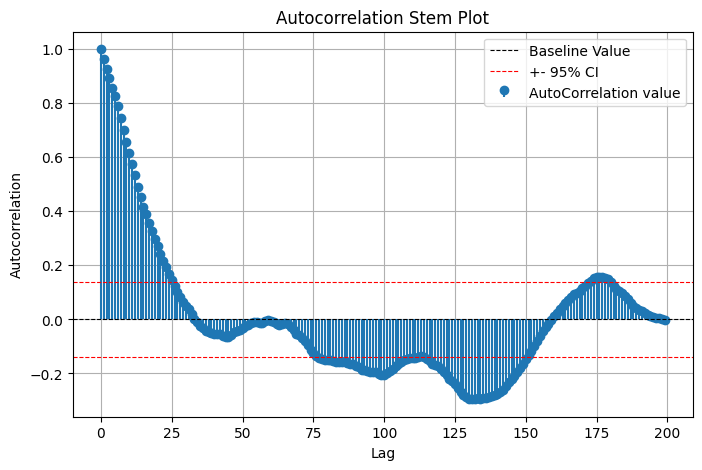

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf


# Compute autocorrelation values
lags = 199  # Number of lags to include
autocorr_values, confInt = acf(
    time_series, nlags=lags, alpha=0.05, bartlett_confint=False
)

# Create stem plot for the autocorrelation
fig, ax = plt.subplots(figsize=(8, 5))
ax.stem(
    range(lags + 1),
    autocorr_values,
    basefmt=" ",
    label="AutoCorrelation value",
)
ax.axhline(
    0, color="black", linewidth=0.8, linestyle="--", label="Baseline Value"
)  # Horizontal baseline
ax.axhline(
    1.96 / np.sqrt(len(time_series)),
    color="red",
    linestyle="--",
    linewidth=0.8,
    label="+- 95% CI",
)
ax.axhline(
    -1.96 / np.sqrt(len(time_series)), color="red", linestyle="--", linewidth=0.8
)

ax.set_title("Autocorrelation Stem Plot")
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.legend(loc="best")
ax.grid()

#### White Noise
Time Series that shows no autocorrelation are called **white noise**.
For white noise we expect each autocorrelation to be close to zero but they will not be exactly zero due to random variation.
For White Noise Series: We expect 95% of the Spikes in the ACF to lie within $\frac{\pm1.96}{\sqrt(T)}$, where T is the length of the Time Series.

If substancially more than 5% of spikes are outside these bounds, then series is probably not white noise.

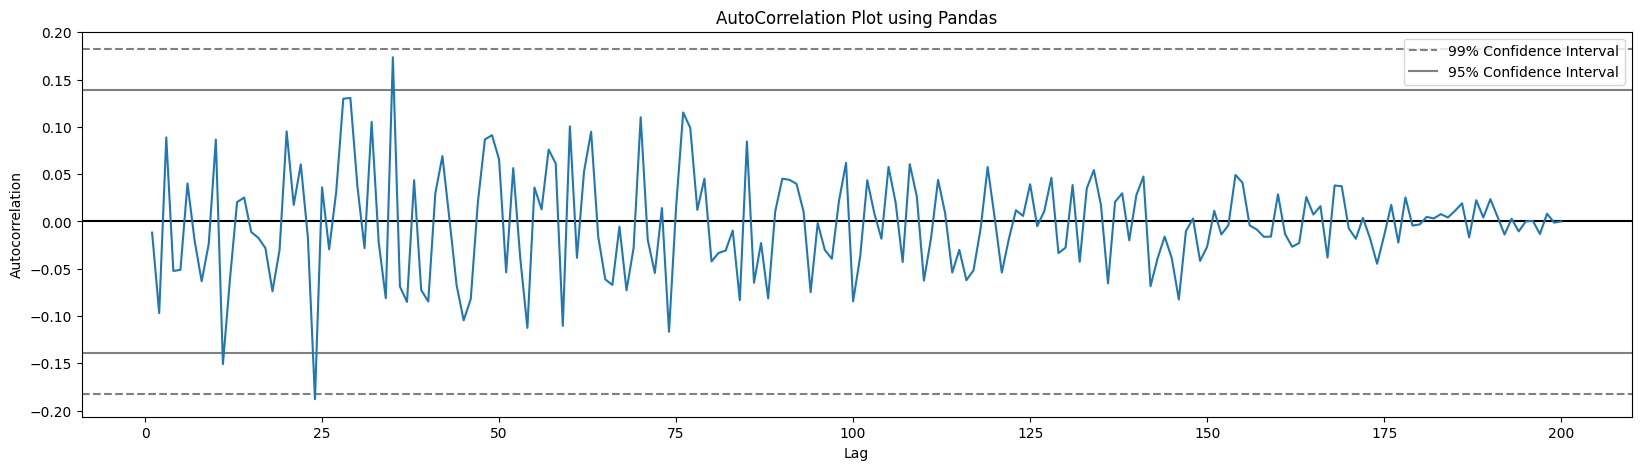

In [48]:
from pandas.plotting import autocorrelation_plot

random_ts = np.random.randn(200)

# AutoCorrelation plots using pandas
fig, ax = plt.subplots(figsize=(20, 5))
ax = autocorrelation_plot(random_ts, ax=ax)
ax.set_title("AutoCorrelation Plot using Pandas")
ax.legend(["99% Confidence Interval", "95% Confidence Interval"], loc="upper right")
ax.grid(False)